# Домашняя работа №1
Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Жесткий срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде: <br\>
** [Майнор ИАД 2016] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

<hr\>

# Регрессия с SVM (3 балла)

Неудивительно, что принципы SVM так же прекрасно ложатся на задачу регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

In [2]:
#!pip install tqdm

In [3]:
import tqdm

In [4]:
from tqdm import tqdm_notebook

In [11]:
data = pd.read_csv('titanium.csv')
data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [12]:
X = pd.DataFrame(data['x'])
y = pd.DataFrame(data['y'])

In [13]:
X.shape

(49, 1)

In [14]:
X.isnull().head()

,x
0,False
1,False
2,False
3,False
4,False


In [15]:
X.describe()

,x
count,49.000000
mean,825.000000
std,142.886902
min,585.000000
25%,705.000000
50%,825.000000
75%,945.000000
max,1065.000000


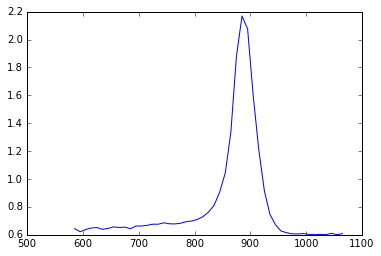

In [16]:
plt.plot(X, y)
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2134)

In [18]:
scaler = StandardScaler()

In [19]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_s = StandardScaler().fit_transform(X)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34, 1), (15, 1), (34, 1), (15, 1))

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [21]:
parameters = np.logspace(-10, 5, 30)

In [22]:
errors_L = []
for elem in tqdm_notebook(parameters):
    clfLinear = SVR(kernel = 'linear', C = elem, epsilon=0.01)
    clfLinear.fit(X_train_s, np.ravel(y_train))
    predicts_L = clfLinear.predict(X_test_s)
    errors_L.append(mean_absolute_error(np.ravel(y_test), predicts_L))

In [23]:
Best_C_L = np.min(errors_L)
Best_C_L

0.15791345985338365

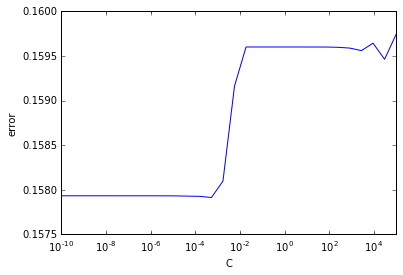

In [24]:
ax = plt.gca()
ax.plot(parameters, errors_L)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('error')
plt.show()

In [25]:
C =parameters[np.argmin(errors_L)]
C

0.00052983169062837125

In [20]:
LinearBest = SVR(kernel = 'linear', C =parameters[np.argmin(errors_L)] , epsilon=0.01)
LinearBest.fit(X_s, np.ravel(y))
predictsBest_L = LinearBest.predict(X_s)

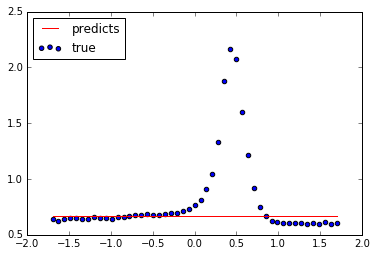

In [21]:
plt.scatter(X_s, y, c='b', label = 'true')
plt.plot(X_s, predictsBest_L, c='r', label = 'predicts')
plt.legend(loc='upper left')

In [45]:
errors_P = []
for elem in tqdm_notebook(parameters):
    clfPoly = SVR(kernel = 'poly', C = elem, epsilon=0.01, degree = 3, gamma = 6, coef0 = 1)
    clfPoly.fit(X_train_s, np.ravel(y_train))
    predicts_P = clfPoly.predict(X_test_s)
    errors_P.append(mean_absolute_error(np.ravel(y_test), predicts_P))

In [46]:
Best_C_P = np.min(errors_P)
Best_C_P

0.16029260267451839

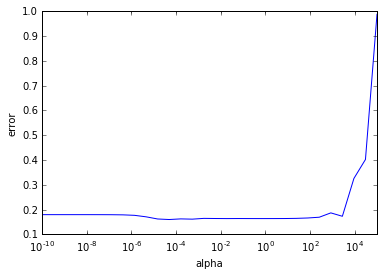

In [47]:
ax = plt.gca()
ax.plot(parameters, errors_P)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

In [48]:
PolyBest = SVR(kernel = 'poly', C = parameters[np.argmin(errors_P)] , epsilon=0.01, degree = 3, gamma = 6, coef0 = 1)
PolyBest.fit(X_s, np.ravel(y))
predictsBest_P = PolyBest.predict(X_s)
errors_P.append(mean_absolute_error(np.ravel(y), predictsBest_P))

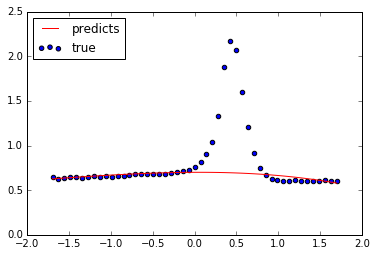

In [49]:
plt.scatter(X_s, y, c='b', label = 'true')
plt.plot(X_s, predictsBest_P, c='r', label = 'predicts')
plt.legend(loc='upper left')

In [104]:
errors_R = []
for elem in tqdm_notebook(parameters):
    clfRBF = SVR(kernel = 'rbf', C = elem, epsilon=0.01, gamma = 6, coef0 = 1)
    clfRBF.fit(X_train_s, np.ravel(y_train))
    predicts_R = clfRBF.predict(X_test_s)
    errors_R.append(mean_absolute_error(np.ravel(y_test), predicts_R))

In [105]:
Best_C_R = np.min(errors_R)
Best_C_R

0.022509732684262165

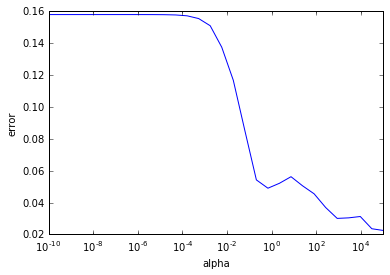

In [106]:
ax = plt.gca()
ax.plot(parameters, errors_R)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

In [107]:
RBFBest = SVR(kernel = 'rbf', C = parameters[np.argmin(errors_R)] , epsilon=0.01, gamma = 6, coef0 = 1)
RBFBest.fit(X_s, np.ravel(y))
predictsBest_R = clfRBF.predict(X_s)

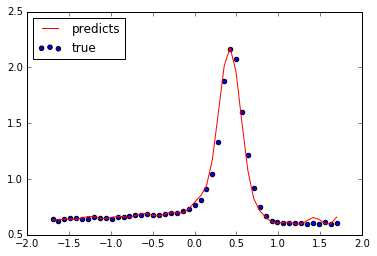

In [108]:
plt.scatter(X_s, y, c='b', label = 'true')
plt.plot(X_s, predictsBest_R, c='r', label = 'predicts')
plt.legend(loc='upper left')

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левенштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [26]:
data_e = pd.read_csv('war_and_peace_en.txt', header = None)
zeros = pd.DataFrame([0]*data_e.shape[0])
data_en = pd.concat([data_e, zeros], axis=1)
data_en.head()

,0,0
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


In [27]:
data_es = pd.read_csv('war_and_peace_es.txt', header = None)
ones = pd.DataFrame([1]*data_es.shape[0])
data_esp = pd.concat([data_es, ones], axis=1)
data_esp.tail()

,0,0
6354,cui,1
6355,gli,1
6356,ospiti,1
6357,sarebbero,1
6358,ritrovati,1


In [28]:
df = pd.concat([data_en, data_esp])
df.columns = ['word', 'label']
df.head(-10)

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0
5,book,0
6,one,0
7,chapter,0
8,well,0
9,prince,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [29]:
from sklearn.cross_validation import train_test_split

In [30]:
RND_SEED = 2134
df_mixed = df.sample(n = df.shape[0], random_state = RND_SEED)
#df_mixed.head()
df_reset = df_mixed.reset_index()
df_reset.head()

,index,word,label
0,4065,aidedecamp,0
1,4412,sgomentarono,1
2,1529,disse,1
3,1966,who,0
4,2769,masculine,0


In [31]:
df_reset_cut = df_reset[:1501]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_reset_cut['index'], df_reset_cut['label'], test_size=0.4, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левенштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [33]:
import pylev

In [34]:
def string_kernel(u, v):
    u = u.ravel()
    v = v.ravel()
    G = np.zeros((u.shape[0], v.shape[0]))
    for i in tqdm_notebook(range(u.shape[0])):
        for j in range(v.shape[0]):
            G[i][j] = np.exp(-pylev.wfi_levenshtein(str(df_reset_cut['word'][df_reset_cut['index']==i]), 
                                                    str(df_reset_cut['word'][df_reset_cut['index']==j])))
    return G          

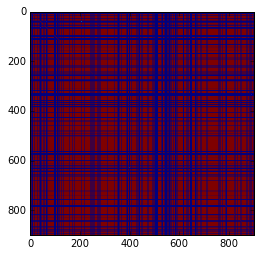

In [51]:
#plt.imshow(string_kernel(X_train, X_train))

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [44]:
C = [0.1, 0.3]

In [45]:
Train_accuracy = []
Test_accuracy = []
for elem in tqdm_notebook(C):
    CustomSVC = SVC(kernel = string_kernel, C = elem)
    CustomSVC.fit(X_train.reshape(-1,1), np.ravel(y_train))
    predicts_C_train = CustomSVC.predict(X_train.reshape(-1,1))
    predicts_C_test = CustomSVC.predict(X_test.reshape(-1,1))
    Train_accuracy.append(accuracy_score(y_train, predicts_C_train))
    Test_accuracy.append(accuracy_score(y_test, predicts_C_test))

In [46]:
 Train_accuracy

[0.58888888888888891, 0.58888888888888891]

In [47]:
 Test_accuracy

[0.55906821963394338, 0.55906821963394338]